In [49]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('2.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [25]:
data.dropna(inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [26]:
# 筛选出需要的数据，鸟喙长和鸟喙深作为x，species作为标签值
data = data.loc[:, ['species', 'bill_length_mm', 'bill_depth_mm']]

In [27]:
data

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6
...,...,...,...
337,Gentoo,47.2,13.7
338,Gentoo,46.8,14.3
339,Gentoo,50.4,15.7
340,Gentoo,45.2,14.8


In [28]:
# 自动化获得多个以标签值为分组的DataFrame

# 命名常量（s1,s2,...,si,...,sn）
i = 1
# 数据条目数
length = len(data.groupby('species').count())
# 存放标签名
labels = list(data.groupby('species').groups.keys())
# 存放多个DataFrame，转换为array，形状为为[[bill_length_mm bill_depth_mm], ..., [[bill_length_mm bill_depth_mm]]]
s = dict()
for i in range(1, length + 1):
    name = 's' + str(i)
    s[labels[i - 1]] = np.array(data[data['species'] == labels[i - 1]].loc[:, ['bill_length_mm', 'bill_depth_mm']])
s

{'Adelie': array([[39.1, 18.7],
        [39.5, 17.4],
        [40.3, 18. ],
        [36.7, 19.3],
        [39.3, 20.6],
        [38.9, 17.8],
        [39.2, 19.6],
        [41.1, 17.6],
        [38.6, 21.2],
        [34.6, 21.1],
        [36.6, 17.8],
        [38.7, 19. ],
        [42.5, 20.7],
        [34.4, 18.4],
        [46. , 21.5],
        [37.8, 18.3],
        [37.7, 18.7],
        [35.9, 19.2],
        [38.2, 18.1],
        [38.8, 17.2],
        [35.3, 18.9],
        [40.6, 18.6],
        [40.5, 17.9],
        [37.9, 18.6],
        [40.5, 18.9],
        [39.5, 16.7],
        [37.2, 18.1],
        [39.5, 17.8],
        [40.9, 18.9],
        [36.4, 17. ],
        [39.2, 21.1],
        [38.8, 20. ],
        [42.2, 18.5],
        [37.6, 19.3],
        [39.8, 19.1],
        [36.5, 18. ],
        [40.8, 18.4],
        [36. , 18.5],
        [44.1, 19.7],
        [37. , 16.9],
        [39.6, 18.8],
        [41.1, 19. ],
        [36. , 17.9],
        [42.3, 21.2],
        [39.6, 17.7],


In [ ]:
# 改为一个函数
def get_label_values_dict(data, group_column_name, selected_column_list):
    # 命名常量（s1,s2,...,si,...,sn）
    i = 1
    # 数据条目数
    length = len(data.groupby(group_column_name).count())
    # 存放标签名
    labels = list(data.groupby(group_column_name).groups.keys())
    # 存放多个DataFrame，转换为array
    s = dict()
    for i in range(1, length + 1):
        name = 's' + str(i)
        s[labels[i - 1]] = np.array(data[data['species'] == labels[i - 1]].loc[:, selected_column_list])
    return s


s = get_label_values_dict(data, 'species', ['bill_length_mm', 'bill_depth_mm'])
s

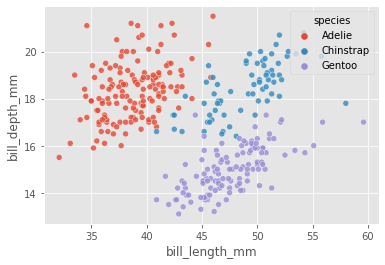

In [34]:
# 绘制散点图
plt.style.use('ggplot')
ax = sns.scatterplot(x='bill_length_mm',  # 指定x轴变量
                     y='bill_depth_mm',  # 指定y轴变量
                     hue='species',  # 指定分组变量
                     data=data,  # 指定绘图数据集
                     alpha=0.8
                     )
sns.move_legend(ax, 'upper right')
# 显示图形
plt.show()

In [43]:
print(np.array(data['species']))

['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adel

In [119]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(np.array(data.loc[:,['bill_length_mm','bill_depth_mm']]), np.array(data['species']), random_state=18, test_size=0.6)

# 创建SVM模型
model = SVC(C=1, kernel='rbf', gamma='auto', probability=True)
model.fit(x_train, y_train)

# print(y_test)
# print(model.predict(x_test))

print(model.score(x_test,y_test))


0.96


In [120]:
res_df = pd.DataFrame(np.concatenate((y_test.reshape(-1,1),model.predict(x_test).reshape(-1,1)),axis=1), columns=['预测值','真实值'])
res_df[res_df['预测值'] != res_df['真实值']]

,预测值,真实值
17,Chinstrap,Adelie
43,Gentoo,Chinstrap
49,Chinstrap,Gentoo
50,Chinstrap,Adelie
77,Chinstrap,Adelie
90,Chinstrap,Gentoo
112,Chinstrap,Adelie
189,Adelie,Chinstrap
